# Exercise 05 : Boxplot

## Imports

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Create a graph like in subjext
- use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task
- the figsize is still the same, you can choose whatever fontsize you like
- the color palette should be the same as in the example
- the fontsize of the title is 15
- the width of the box lines is 3, the width of the median lines is 2

## Reading data

In [3]:
tests = pd.read_csv('../data/ab-test.csv')
tests.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


## Split data to before and after

In [4]:
data_before = tests[tests['time'] == 'before'][['group', 'diff']]
data_before = [data_before[data_before['group'] == group]['diff'].tolist() for group in ('control', 'test')]
data_before

[[-103.0,
  -15.5,
  -3.0,
  -153.0,
  -202.0,
  -16.0,
  -156.0,
  -75.0,
  -40.0,
  -3.5,
  -176.5,
  -95.0,
  -228.0,
  -16.5,
  -187.5],
 [-6.0, -3.5, -148.0, -112.5, -69.33333333333333, -53.0, -70.0]]

In [5]:
data_after = tests[tests['time'] == 'after'][['group', 'diff']]
data_after = [data_after[data_after['group'] == group]['diff'].tolist() for group in ('control', 'test')]
data_after


[[-75.0,
  -81.5,
  -32.0,
  17.5,
  -94.0,
  -49.0,
  -131.66666666666666,
  -322.6666666666667,
  -77.0,
  -9.0,
  -144.66666666666666,
  -114.5,
  -140.66666666666666,
  -93.33333333333331,
  -142.33333333333334],
 [-103.33333333333331,
  -10.0,
  -82.33333333333333,
  -78.5,
  -127.5,
  -136.5,
  -158.5]]

## Creating a graph

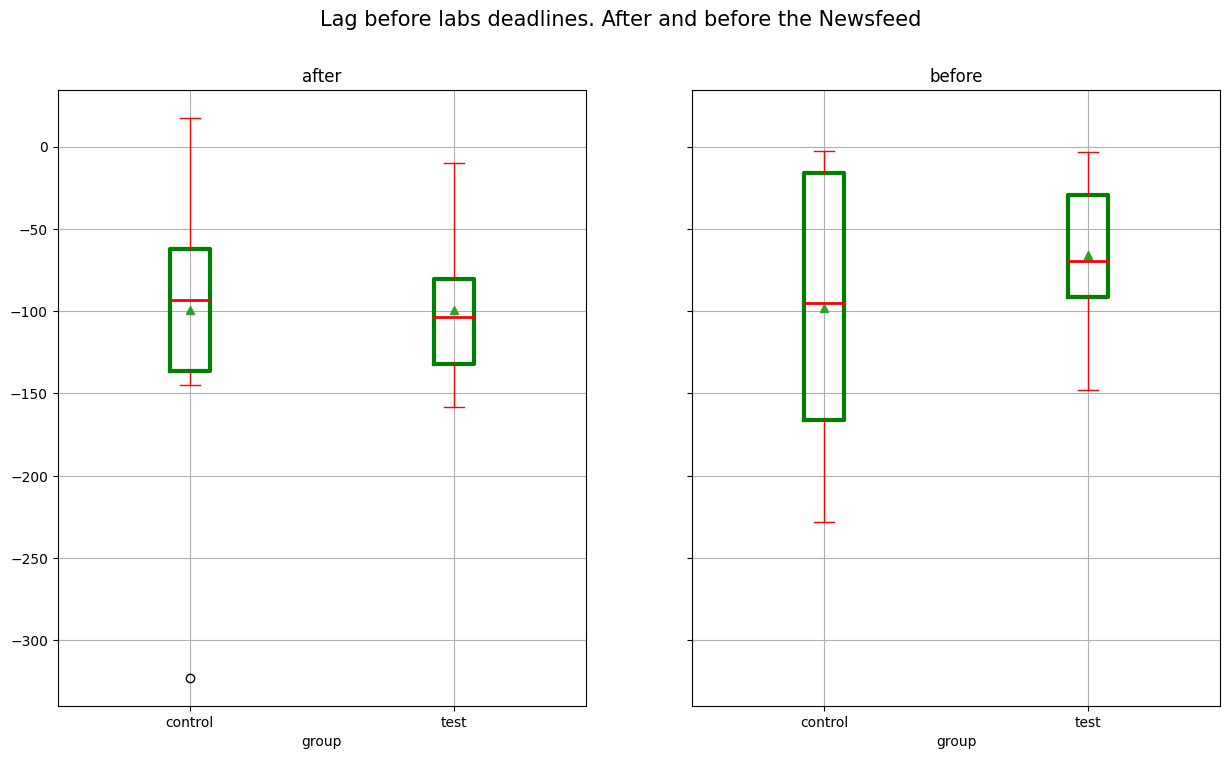

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

axs[0].boxplot(data_after,
               labels=['control', 'test'],
               showmeans=True,
               boxprops={ 'color': 'green', 'linewidth': 3 },
               whiskerprops={ 'color': 'red'},
               capprops={ 'color': 'red' },
               medianprops={ 'color': 'red', 'linewidth': 2 }
              )
axs[0].set_title('after')
axs[0].grid('xy')
axs[0].set_xlabel('group')

axs[1].boxplot(data_before, 
               labels=['control', 'test'],
               showmeans=True,
               boxprops={ 'color': 'green', 'linewidth': 3 },
               whiskerprops={ 'color': 'red' },
               capprops={ 'color': 'red' },
               medianprops={ 'color': 'red', 'linewidth': 2 }
              )
axs[1].set_title('before')
axs[1].grid('xy')
axs[1].set_xlabel('group')

plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

## What was the IQR of the control group before the newsfeed?
The answer is: 150